In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#data_path = ("https://github.com/llimllib/bostonmarathon/blob/master/results/2014/results.csv")
#df = pd.read_csv(data_path)
df = pd.read_csv("results.csv")
df

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [3]:
#Goal: use the tools at hand to determine which clustering solution, including number of clusters and 
#algorithm used, is best for the marathon data.

#Once you have a solution you like, write a data story, including visualizations, 
#where you teach the reader something about the Boston Marathon based on your clusters. 

# First let's clean the data before we make clusters with it.

In [4]:
df.shape

(31984, 21)

In [5]:
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

ctz      30740
state     2576
city         1
dtype: int64


In [6]:
df['ctz'].value_counts(dropna=False).head()

NaN    30740
GBR      171
CAN      143
USA      135
JPN       95
Name: ctz, dtype: int64

In [7]:
df['state'].value_counts(dropna=False).head()

MA     7587
NaN    2576
CA     2326
NY     1553
ON     1052
Name: state, dtype: int64

In [8]:
df['city'].value_counts(dropna=False).tail()

Shizuoka, Shizuoka    1
Cintre                1
Staines               1
Coeymans Hollow       1
NaN                   1
Name: city, dtype: int64

In [9]:
#all of the missing columns are of object types and related to City, state and country. I will replace the missing
#values with None.

df['ctz'].fillna(value='NONE', inplace=True)
df['state'].fillna(value='NONE', inplace=True)
df['city'].fillna(value='NONE', inplace=True)

In [10]:
#check to see if there are any more columns with missing data

missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [11]:
#let's check to see how many columns are numerical and how many are objects
df.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [12]:
# we need to convert are race, offical time and pace into numerical columns
numeric = ['10k','25k','age','official','35k','overall','pace','30k','5k','half','20k','40k']
df[numeric] = df[numeric].apply(pd.to_numeric, errors = 'coerce', axis=1)
print(df.dtypes)

10k          float64
name          object
division       int64
25k          float64
gender        object
age          float64
official     float64
bib           object
genderdiv      int64
ctz           object
35k          float64
overall      float64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object


In [13]:
#convert age to binary variable to use later as our y variable in our cluster model
df['gender_bin'] = df['gender']
df['gender_bin'] = np.where(df['gender_bin']=='M',0,1)

In [14]:
#drop the object columns to use in the cluster model
drop = ['name','gender','bib','ctz','state','country','city']
dropna = df.dropna(subset = numeric)

continuousdata = dropna.drop(drop, axis=1)
print(continuousdata.dtypes)
print(continuousdata.head())


10k           float64
division        int64
25k           float64
age           float64
official      float64
genderdiv       int64
35k           float64
overall       float64
pace          float64
30k           float64
5k            float64
half          float64
20k           float64
40k           float64
gender_bin      int64
dtype: object
     10k  division    25k   age  official  genderdiv     35k  overall  pace  \
0  17.37         8  47.67  47.0     85.25          8   71.40      8.0  3.27   
1  32.58         1  82.43  33.0    138.95          1  116.37     21.0  5.30   
2  16.62         1  45.80  41.0     80.60          1   67.42      1.0  3.08   
3  32.57         3  82.43  24.0    140.58          3  116.37     27.0  5.37   
4  17.12         2  46.37  40.0     81.23          2   67.83      2.0  3.10   

     30k     5k   half    20k     40k  gender_bin  
0  59.18   8.02  39.72  37.65   80.43           0  
1  99.33  16.22  69.47  65.83  132.10           1  
2  56.45   7.75  38.03  3

# Let's explore the data

In [15]:
continuousdata.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,gender_bin
0,17.37,8,47.67,47.0,85.25,8,71.40,8.0,3.27,59.18,8.02,39.72,37.65,80.43,0
1,32.58,1,82.43,33.0,138.95,1,116.37,21.0,5.30,99.33,16.22,69.47,65.83,132.10,1
2,16.62,1,45.80,41.0,80.60,1,67.42,1.0,3.08,56.45,7.75,38.03,36.10,76.10,0
3,32.57,3,82.43,24.0,140.58,3,116.37,27.0,5.37,99.33,16.20,69.47,65.83,132.95,1
4,17.12,2,46.37,40.0,81.23,2,67.83,2.0,3.10,57.03,8.02,38.60,36.58,76.72,0


In [16]:
continuousdata.shape

(31649, 15)

# Let's begin to model our data into clusters

In [17]:
# Mean Shift

In [18]:
from sklearn import metrics

rows = continuousdata.shape[0] - continuousdata.shape[0] % 4
df_new = continuousdata.iloc[:rows, :]

# Break into a set of features and a variable for the known outcome.
#X = df_new.drop(['gender_bin'],axis=1).reset_index()
#y = df_new.iloc[:, -1]

# Break into a set of features and a variable for the known outcome.
X = df_new.iloc[:, :15]
y = df_new.iloc[:, 14]



# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()


# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)



Number of estimated clusters: 3


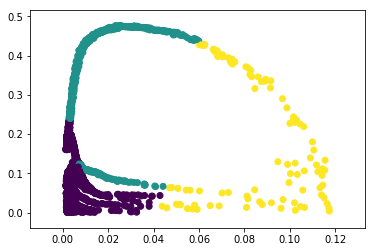

Number of estimated clusters: 4


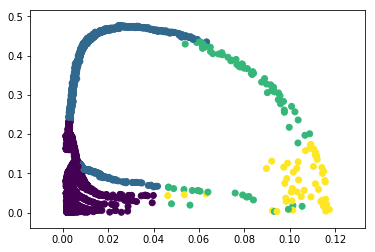

Number of estimated clusters: 3


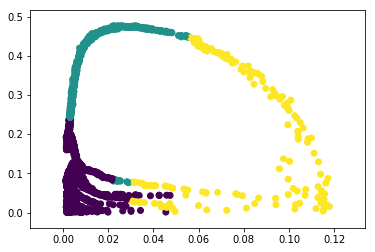

Number of estimated clusters: 7


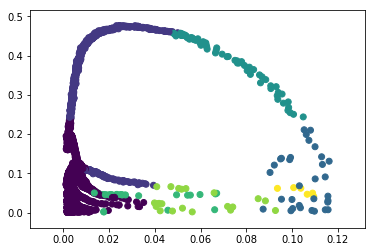

In [19]:
#let's use the Mean shift model first because I don't know how many clusters I am looking for

from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.

for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):

    bandwidth = estimate_bandwidth(data[0], quantile=0.3, n_samples=1000)


    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data[0])

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))
    #print('Show the labels', labels)

    #plot the clusters
    plt.scatter(data[0][:, 0], data[0][:, 1], c=labels)
    plt.show()

In [20]:
#run the model for K-means

In [65]:
from sklearn import metrics

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 3 to 7. As the number of clusters were
    #obtain from the mean shift model
    for nclust in range(3, 8):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

In [51]:
ypred.head()

,pca_f1_sample0,pca_f2_sample0,clust3_sample0,clust4_sample0,clust5_sample0,clust6_sample0,clust7_sample0,pca_f1_sample1,pca_f2_sample1,clust3_sample1,...,clust5_sample2,clust6_sample2,clust7_sample2,pca_f1_sample3,pca_f2_sample3,clust3_sample3,clust4_sample3,clust5_sample3,clust6_sample3,clust7_sample3
0,-0.192804,0.016683,0,0,0,3,4,0.020004,-0.030560,2,...,0,0,4,-0.012026,-0.074310,1,1,1,4,0
1,0.086204,-0.093198,1,2,3,1,1,0.120168,-0.102129,2,...,0,0,4,-0.154406,0.005112,0,0,3,0,5
2,-0.216867,0.135440,0,0,0,0,0,-0.109410,0.075463,0,...,4,5,5,-0.108868,-0.023306,0,0,3,0,5
3,-0.141490,-0.036412,0,0,0,3,4,-0.031256,-0.092025,2,...,1,4,6,-0.034300,-0.100372,1,1,1,4,0
4,0.151206,-0.138061,1,2,1,5,5,-0.146096,0.100716,0,...,1,4,6,-0.116327,-0.035756,0,0,3,0,5


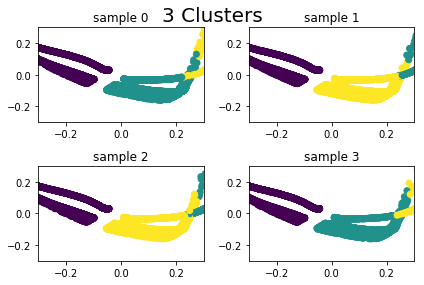

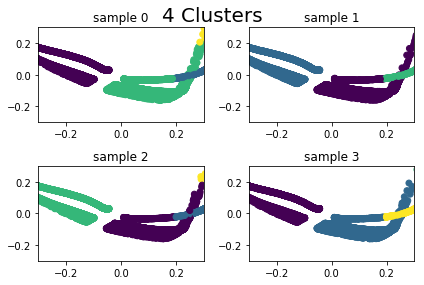

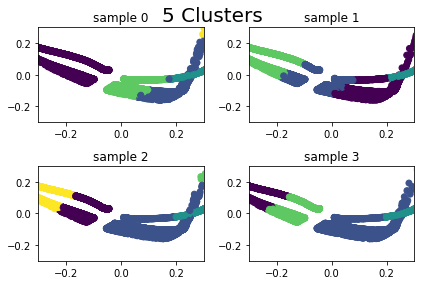

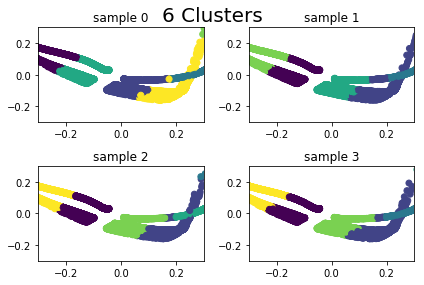

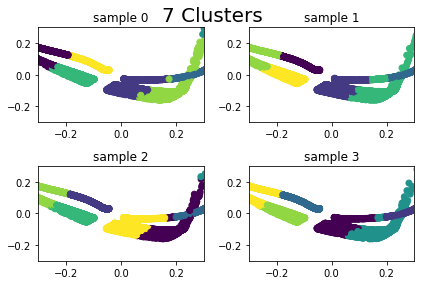

In [53]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(3, 8):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [25]:
#lets run the spectral clustering model

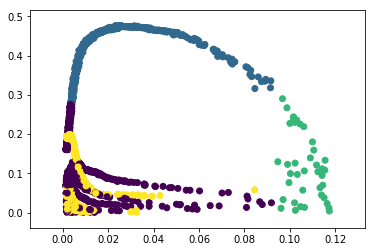

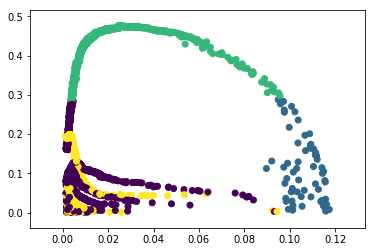

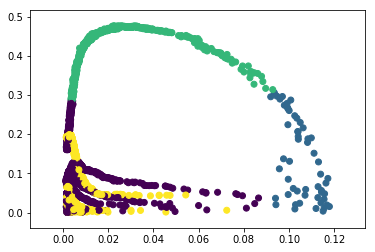

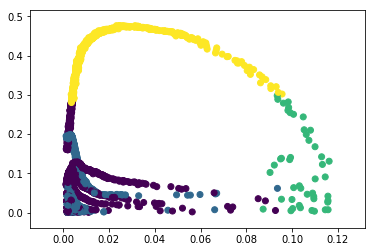

In [66]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=4

for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):


    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(data[0])

    #Predicted clusters.
    predict=sc.fit_predict(data[0])

    #Graph results.
    plt.scatter(data[0][:, 0], data[0][:, 1], c=predict)
    plt.show()

    #print('Comparing the assigned categories to the ones in the data:')
    #print(pd.crosstab(y,predict))

In [ ]:
#let's use the affinity model

In [68]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):

    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(data[0])

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 6369
Estimated number of clusters: 3838
Estimated number of clusters: 5200
Estimated number of clusters: 5548


# Lets evaluate our model performance to see which one performs the best. 

In [164]:
# #Silhouette Score metric for K-mean
data[:] = [] #reset the list to null 
for sample, nclust in zip([X1, X2, X3, X4],range(3, 8)):
    model = KMeans(n_clusters=nclust, random_state=42).fit(sample)
    labels = model.labels_
    score = metrics.silhouette_score(sample, labels, metric='euclidean')
    #Result = [nclust, score]
    if len(data) <= 0:
        data = [{'Model':'K-Mean', 'Cluster_number': nclust, 'score': score}]
        df_results = pd.DataFrame(data)
    else:
        data = [{'Model':'K-Mean', 'Cluster_number': nclust, 'score': score}]
        df_results = df_results.append(data)

print(df_results)

   Cluster_number   Model     score
0               3  K-Mean  0.479670
0               4  K-Mean  0.492985
0               5  K-Mean  0.457139
0               6  K-Mean  0.449835


In [165]:
# Silhouette Score metric for Mean shift
for sample, nclust in zip([X1, X2, X3, X4],range(3, 8)):
    model = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(sample)
    labels = model.labels_
    #print(metrics.silhouette_score(sample, labels, metric='euclidean'))
    if len(data) <= 0:
        data = [{'Model':'MeanShift', 'Cluster_number': nclust, 'score': score}]
        df_results = pd.DataFrame(data)
    else:
        data = [{'Model':'MeanShift', 'Cluster_number': nclust, 'score': score}]
        df_results = df_results.append(data)
print(df_results)

0.4915684904383025
0.49385290391816883
0.5144873928750716
0.43076687582613704
   Cluster_number      Model     score
0               3     K-Mean  0.479670
0               4     K-Mean  0.492985
0               5     K-Mean  0.457139
0               6     K-Mean  0.449835
0               3  MeanShift  0.449835
0               4  MeanShift  0.449835
0               5  MeanShift  0.449835
0               6  MeanShift  0.449835


In [166]:
# Silhouette Score metric for Spectral clustering
for sample, nclust in zip([X1, X2, X3, X4],range(3, 8)):
    model = SpectralClustering(n_clusters=10).fit(sample)
    labels = model.labels_
    #print(metrics.silhouette_score(sample, labels, metric='euclidean'))
    if len(data) <= 0:
        data = [{'Model':'SpectralCluster', 'Cluster_number': nclust, 'score': score}]
        df_results = pd.DataFrame(data)
    else:
        data = [{'Model':'SpectralCluster', 'Cluster_number': nclust, 'score': score}]
        df_results = df_results.append(data)
print(df_results)

0.40014389061472155
0.40542653002370077
0.41204102000296716
0.4196449451915468
   Cluster_number            Model     score
0               3           K-Mean  0.479670
0               4           K-Mean  0.492985
0               5           K-Mean  0.457139
0               6           K-Mean  0.449835
0               3        MeanShift  0.449835
0               4        MeanShift  0.449835
0               5        MeanShift  0.449835
0               6        MeanShift  0.449835
0               3  SpectralCluster  0.449835
0               4  SpectralCluster  0.449835
0               5  SpectralCluster  0.449835
0               6  SpectralCluster  0.449835


In [181]:
# Silhouette Score metric for Affinity clustering
for sample, nclust in zip([X1, X2, X3, X4],range(3, 8)):
    model = AffinityPropagation().fit(sample)
    labels = model.labels_
    #print(metrics.silhouette_score(sample, labels, metric='euclidean'))
    if len(data) <= 0:
        data = [{'Model':'AffinityPropagation', 'Cluster_number': nclust, 'score': score}]
        df_results = pd.DataFrame(data)
    else:
        data = [{'Model':'AffinityPropagation', 'Cluster_number': nclust, 'score': score}]
        df_results = df_results.append(data)
print(df_results)

0.04343447729514049
0.16577354320710175
0.09286141817350736
0.08614104761265094
   Cluster_number                Model     score
0               3               K-Mean  0.479670
0               4               K-Mean  0.492985
0               5               K-Mean  0.457139
0               6               K-Mean  0.449835
0               3            MeanShift  0.449835
0               4            MeanShift  0.449835
0               5            MeanShift  0.449835
0               6            MeanShift  0.449835
0               3      SpectralCluster  0.449835
0               4      SpectralCluster  0.449835
0               5      SpectralCluster  0.449835
0               6      SpectralCluster  0.449835
0               3  AffinityPropagation  0.449835
0               4  AffinityPropagation  0.449835
0               5  AffinityPropagation  0.449835
0               6  AffinityPropagation  0.449835


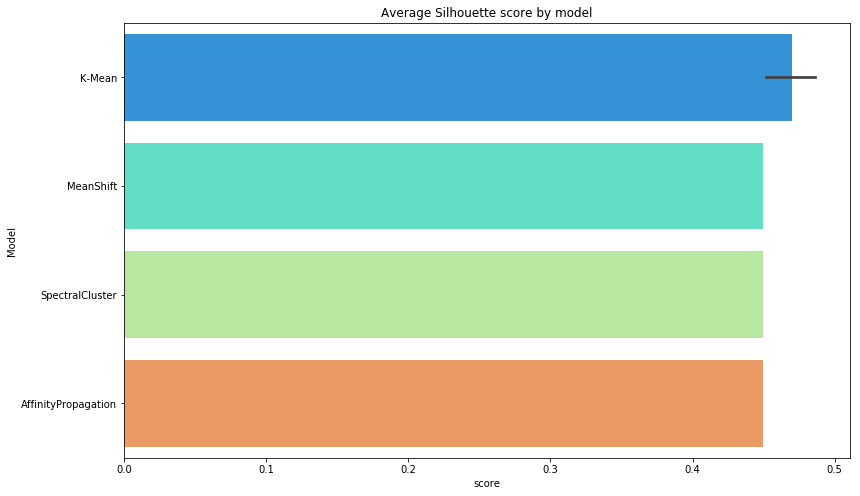

In [266]:
#Visualation plot to show K-mean is slightly out performing the other models based on the average silhouette
#score by model
g = sns.barplot(df_results['score'], df_results['Model'], palette='rainbow')
g.figure.set_size_inches(13,8)
g.set_title("Average Silhouette score by model")
plt.show()

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


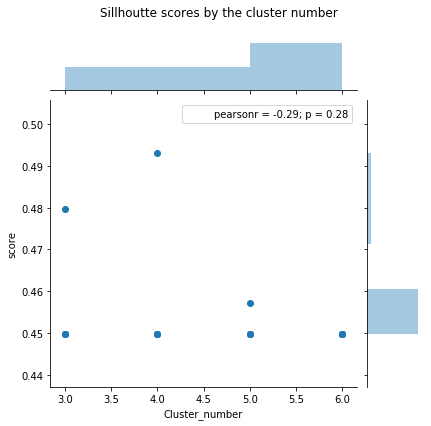

In [265]:
#another visualazation plot to show the sillhouette scores compared to the number of clusters
g = sns.jointplot(x='Cluster_number', y='score', data=df_results, kind='scatter') #default to scatter
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sillhoutte scores by the cluster number') # can also get the figure from plt.gcf()
plt.show()

In [ ]:
#Overall summary: 
#K-means performed the best in terms of providing the right amount of clustering.

#overall process:
#I ran the mean shift model first to determine the number of clusters, since I didn't know how many clusters
#the data had. The mean shift model predicted 3-7 cluster. I used the information from the mean shift model as input 
#for the number of clusters into the other other models. After I executed all of the models I used the sillhoutte 
#score to determine how similar the clusters are to each other. 
#The average sillhoutee score for the number of predicted clusters for K-means was 0.48